In [14]:
import random
from math import log, floor, pow
from collections import defaultdict
import matplotlib.pyplot as plt

In [15]:
class Rectangle: 
    def __init__(self, width, height):
        self.height, self.width = height, width

    def rotate(self):
        self.height, self.width = (self.width, self.height) if self.height < self.width else (self.height, self.width)
        
    def get_dimensions(self):
        return self.height, self.width
    
    def get_area(self):
        return self.height * self.width
    
    def __str__(self):
        return f"Rectangle({self.width}, {self.height})"
    
    def __repr__(self):
        return self.__str__()

In [16]:
class Block:
    def __init__(self, height, n, W):
        self.created_at = n
        self.height = height
        self.rectangle_widths = 0 
        self.full = False
        self.rectangles = []
        self.W = W
        
    def add_rectangle(self, rectangle):
        self.rectangle_widths += rectangle.width
        self.rectangles.append(rectangle)
        if self.rectangle_widths > 1-self.W:
            self.set_full()
        
    def get_full(self):
        return self.full
    
    def set_full(self):
        self.full = True

In [17]:
# Optimizations:
## Keep track of the minimum width a rectangle needs for it to be able to block 
## Delete full blocks

class Strip:
    def __init__(self, W, alpha, width=1):
        self.blocks = defaultdict(list) # "height" : 
        self.blocks_seq = []
        self.block_counter = 0
        self.width = width
        self.opt_lower_bound = 0
        self.alpha = alpha
        self.W = W
        
    def get_opt_lower_bound(self):
        return self.opt_lower_bound
    
    def get_height(self):
        return sum(block.height for block in self.blocks_seq) 
        
    def insert(self, rectangle):
        rectangle.rotate()
        if rectangle.width > 1 or rectangle.height > 1:
            raise ValueError("Width and height cannot be greater than 1")
        self.opt_lower_bound += rectangle.get_area()
        bh = self._nearest_power(rectangle.height, self.alpha)
        # Check if rectangle is a buffer
        if rectangle.width >= self.W:
            self._insert_new_block(bh, rectangle)
        # Else try to find a viable block
        else: self._insert_small_rectangle(bh, rectangle)
        return 
                
    def _insert_small_rectangle(self, bh, rectangle):
        candidates = self.blocks.get(bh)
        if not candidates:
            self._insert_new_block(bh, rectangle)
        else:
            viable_block = self._find_viable_block(candidates, rectangle.width)
            if viable_block: viable_block.add_rectangle(rectangle); print
            else: self._insert_new_block(bh, rectangle)
        
    def _find_viable_block(self, candidates, width):
        lowest_viable = None
        for i in range(len(candidates)-1, -1, -1):
            if 1-candidates[i].rectangle_widths < width:
                break
            if not candidates[i].get_full():
                lowest_viable = candidates[i]
        return lowest_viable
            
    def _insert_new_block(self, height, rectangle):
        self.block_counter += 1
        b = Block(height, self.block_counter, self.W)
        b.add_rectangle(rectangle)
        if b.rectangle_widths > 1-self.W:
                b.set_full() 
        self.blocks[height] += [b]
        self.blocks_seq.append(b)
        return
        
    def _nearest_power(self, height, alpha):
        ans = None
        for guess in range(10000, -1, -1): # 0 < alpha < 1 and 0.9\bar{9}^{10000} \approx 0. 
            if pow(alpha,guess) >= height:
                ans = pow(alpha,guess)
                break
        return ans
    
    def plot_packing(self, scaling=1):
        height = self.get_height()
        fig = plt.figure(figsize=(2, max(10, height)))
        ax = fig.add_subplot(111)
        ax.set_xlim([0, 1])
        ax.set_ylim([0, height+0.1/scaling])
        ax.set_aspect('equal')
        cur_y = 0
        for idx, block in enumerate(self.blocks_seq):
            cur_x = 0
            if idx != len(self.blocks_seq)-1:
                ax.axhline(cur_y+block.height, color = 'r', linestyle = '--')
            for rectangle in block.rectangles:
                ax.add_patch(plt.Rectangle((cur_x, cur_y),
                                           rectangle.width,
                                           rectangle.height,
                                           linestyle="-",
                                           ec = "black",
                                           fc = "grey"))
                cur_x += rectangle.width
            cur_y += block.height
        return

In [18]:
def generate_random_rectangles(n):
    return [Rectangle(random.uniform(0.01,0.2), random.uniform(0.01,0.2)) for _ in range(n)]

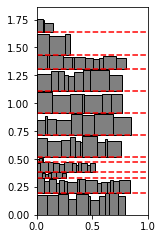

In [19]:
rectangles = generate_random_rectangles(100)
strip = Strip(1/4, 2/3)
for rectangle in rectangles:
    strip.insert(rectangle)
    
strip.plot_packing()